In [1]:
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import Callback
from keras.datasets import mnist

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Utils

In [2]:
def plotHistory(loss, acc):
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)

    plt.plot(loss)
    plt.title('loss through training')
    plt.ylabel('loss')
    plt.xlabel('batch')

    plt.subplot(1, 2, 2)
    plt.plot(acc, 'g')
    plt.title('accuracy through training')
    plt.ylabel('accuracy')
    plt.xlabel('batch')

# Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float16') / 255.
x_test = x_test.astype('float16') / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("training data: {}".format(x_train.shape))
print("testing data: {}".format(x_test.shape))

training data: (60000, 28, 28, 1)
testing data: (10000, 28, 28, 1)


# Network

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1,)),
    Dense(200, activation="relu"),
    Dropout(0.2),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax"),
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


# Hyper Parameters

In [5]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Training

In [6]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []
    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))

In [7]:
history = LossHistory()
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=128, callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 2s - loss: 0.5122 - acc: 0.8508 - val_loss: 0.2375 - val_acc: 0.9333
Epoch 2/3
60000/60000 [==============================] - 2s - loss: 0.2315 - acc: 0.9320 - val_loss: 0.1630 - val_acc: 0.9501
Epoch 3/3
60000/60000 [==============================] - 2s - loss: 0.1766 - acc: 0.9484 - val_loss: 0.1285 - val_acc: 0.9621


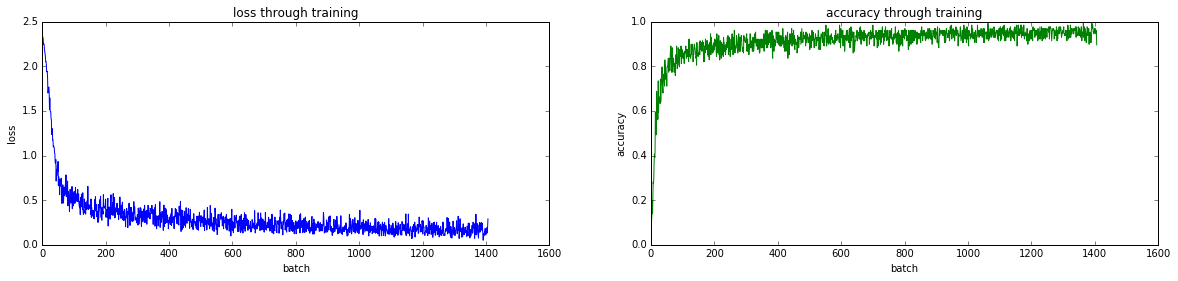

In [8]:
plotHistory(history.loss, history.acc)

# Test

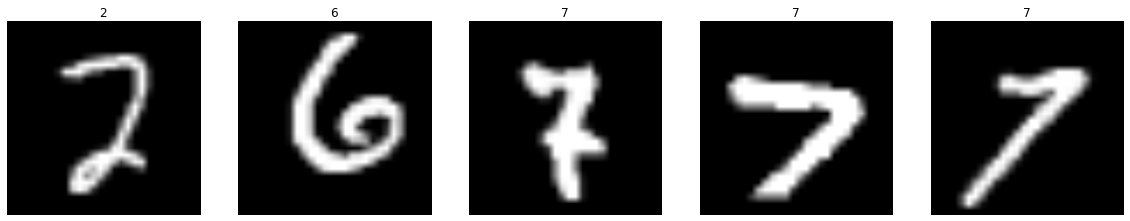

In [9]:
n_image = 5

display_index = np.random.choice(x_test.shape[0], n_image)
images = np.array([x_train[i] for i in display_index])
id_class = np.argmax(model.predict(images), axis=1)

plt.figure(figsize=(20, 4))

for i in range(n_image):
    ax = plt.subplot(1, n_image, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title("{0}".format(id_class[i]))
    